In [1]:
import pegasus as pg

### Load data

In [2]:
data = pg.read_input('MantonBM_result.zarr.zip')

2022-02-22 22:15:17,103 - pegasusio.readwrite - INFO - zarr file 'MantonBM_result.zarr.zip' is loaded.
2022-02-22 22:15:17,104 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.90s.


### Generate pseudo bulk matrix

In [3]:
pseudo = pg.pseudobulk(data, 'Channel', 'gender')
pseudo

2022-02-22 22:15:17,408 - pegasus.tools.pseudobulk - INFO - Function 'pseudobulk' finished in 0.30s.


R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



2022-02-22 22:15:35,048 - pegasus.tools.pseudobulk - INFO - Function 'deseq2' finished in 17.64s.
2022-02-22 22:15:35,689 - pegasus.tools.utils - INFO - Loaded signatures from GMT file /Users/lib75/Documents/software/pegasus/pegasus/data_files/c2.cp.v7.5.1.symbols.gmt.
2022-02-22 22:15:39,190 - pegasus.tools.fgsea - INFO - Function 'fgsea' finished in 4.14s.


### DESeq2

In [8]:
pg.deseq2(pseudo, '~gender', ('gender', 'female', 'male'))

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



2022-02-22 22:28:28,131 - pegasus.tools.pseudobulk - INFO - Function 'deseq2' finished in 14.42s.


### Get significant DE genes in human-readable format

In [9]:
markers = pg.pseudo.markers(pseudo)
print(markers)

{'up':                baseMean  log2FoldChange     lfcSE       stat        pvalue  \
featurekey                                                                   
XIST        1630.421395       13.395838  1.045060  12.818247  1.295980e-37   
PPP1R2C       13.782016        7.228161  1.164681   6.206131  5.430477e-10   
LINC00221      8.291609        5.054996  1.236642   4.087680  4.357081e-05   
TSIX          11.956089        3.691505  0.735298   5.020417  5.155941e-07   
PPBP         353.912934        1.914636  0.428609   4.467088  7.929145e-06   
KANTR         76.629408        1.258039  0.286294   4.394226  1.111680e-05   
BX890604.2   275.050612        1.221936  0.267791   4.563023  5.042230e-06   
JPX         1022.277223        0.890435  0.201457   4.419970  9.871462e-06   

                    padj  
featurekey                
XIST        1.143443e-33  
PPP1R2C     5.989137e-07  
LINC00221   3.203544e-02  
TSIX        5.054541e-04  
PPBP        6.662748e-03  
KANTR       8.528999e-0

### Write DE results to spreadsheet

In [10]:
pg.pseudo.write_results_to_excel(markers, 'test.de.xlsx')

2022-02-22 22:29:33,856 - pegasus.pseudo.convenient - INFO - Excel spreadsheet is written.
2022-02-22 22:29:33,857 - pegasus.pseudo.convenient - INFO - Function 'write_results_to_excel' finished in 0.19s.


### Generate volcano plot

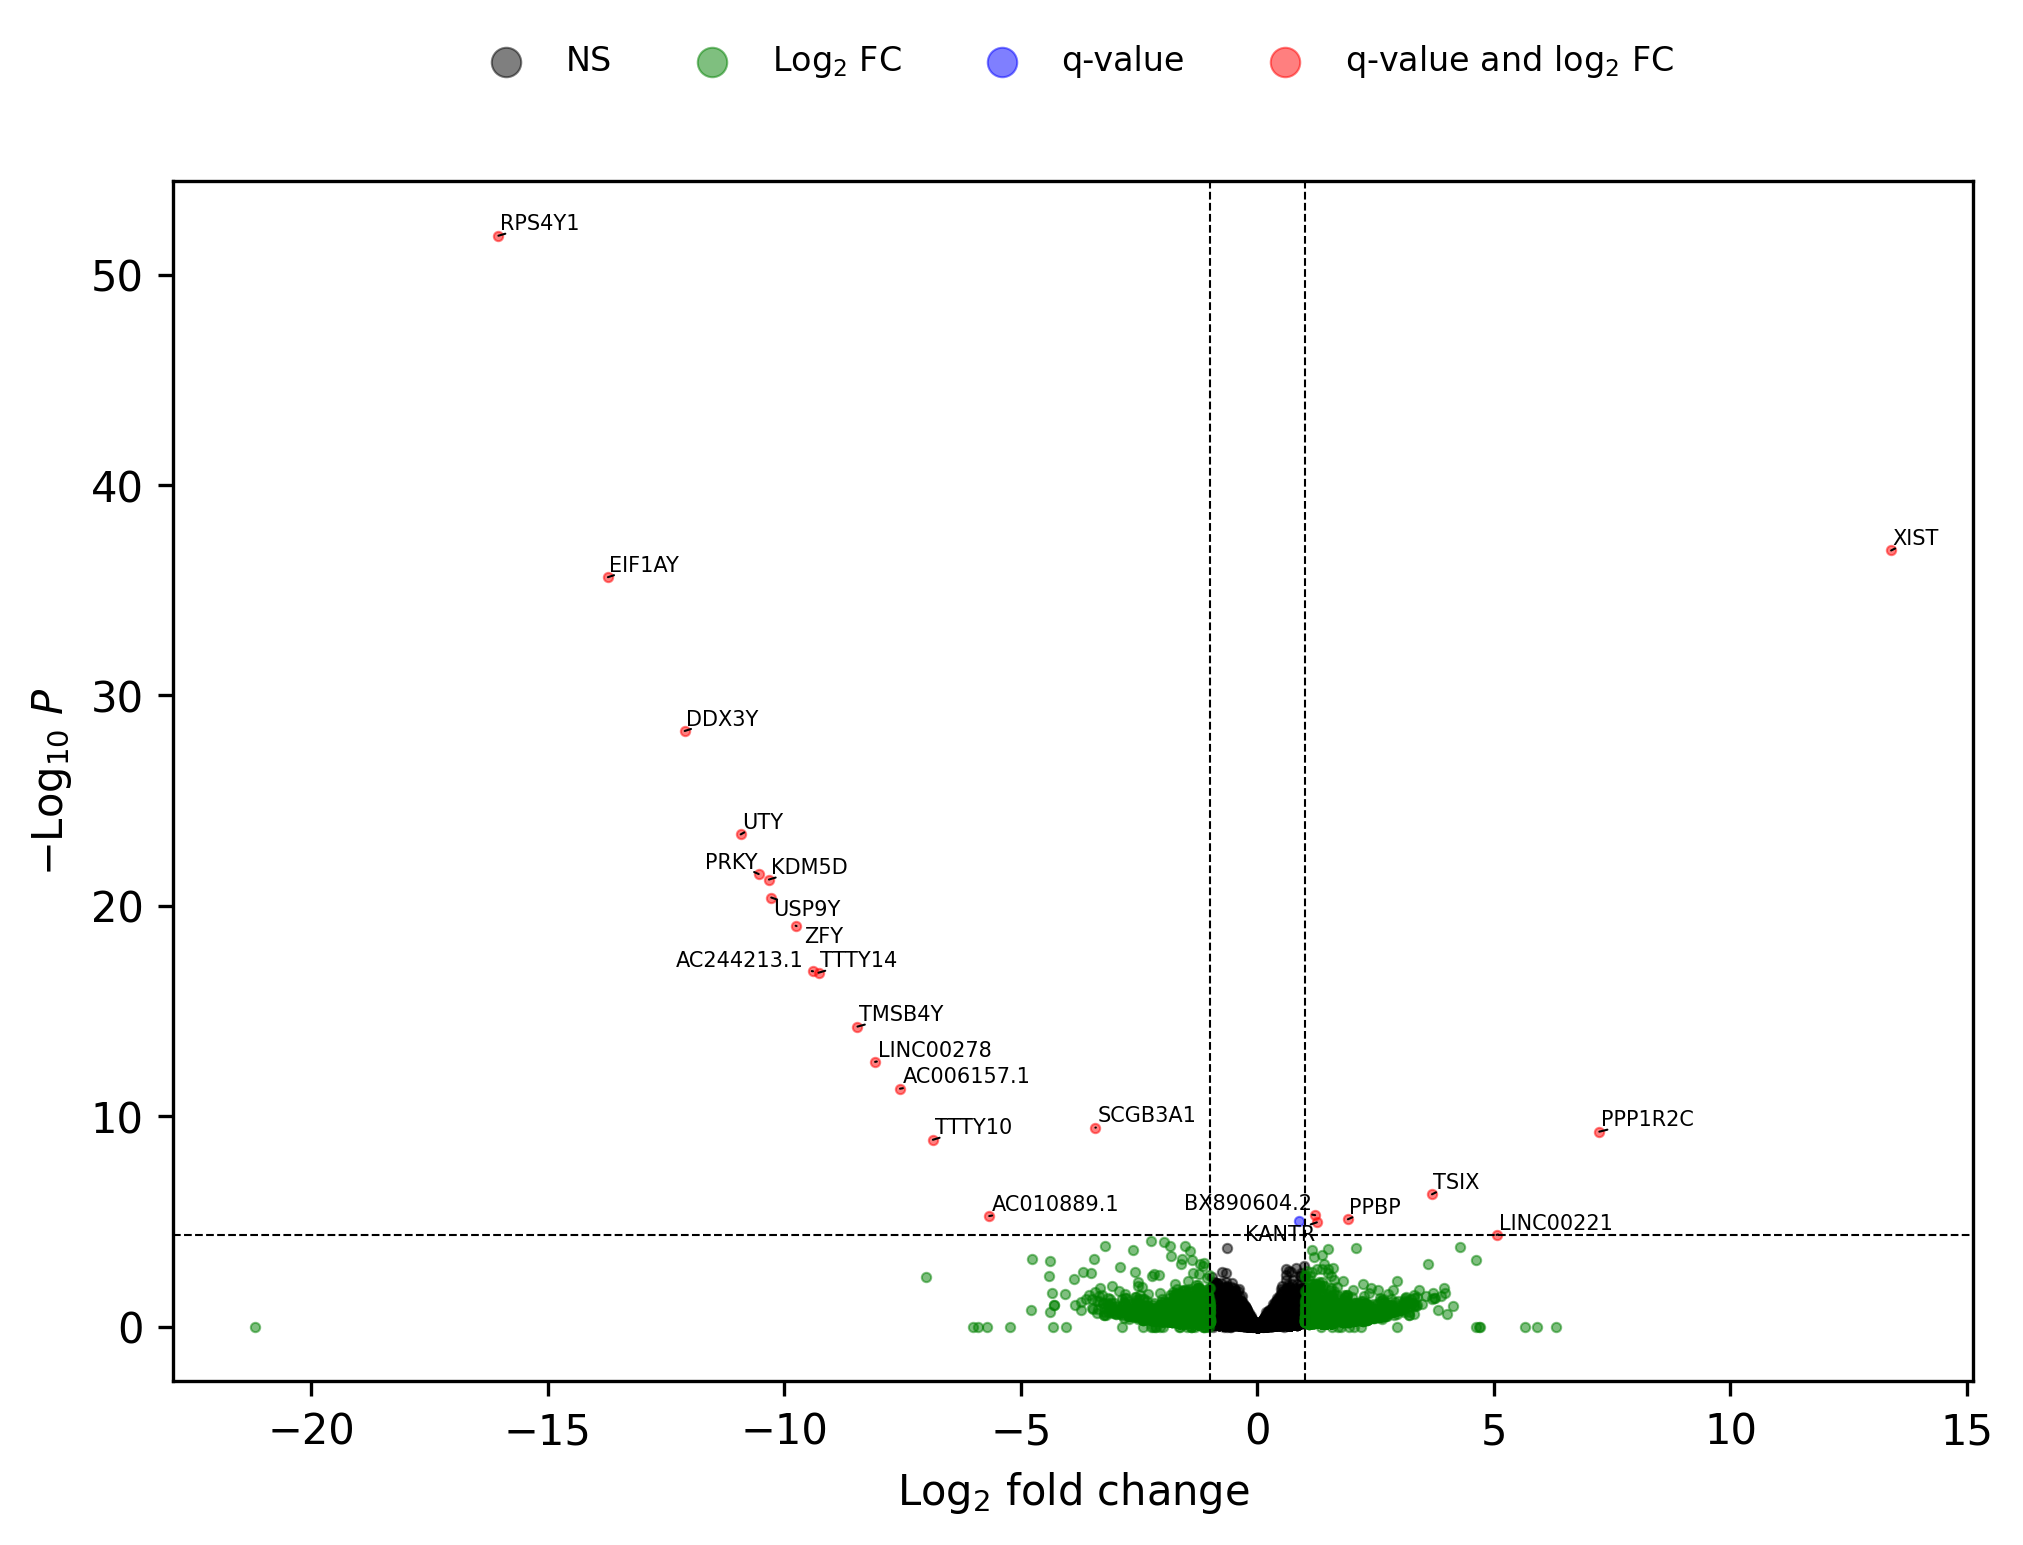

In [11]:
pg.pseudo.volcano(pseudo)

### GSEA analysis using fGSEA, note this function is applicable to both DE results from single-cells and pseudo-bulks

In [12]:
pg.fgsea(pseudo, 'log2FoldChange', 'canonical_pathways', 'deseq2', fgsea_key = 'fgsea_deseq2')

2022-02-22 22:30:42,197 - pegasus.tools.utils - INFO - Loaded signatures from GMT file /Users/lib75/Documents/software/pegasus/pegasus/data_files/c2.cp.v7.5.1.symbols.gmt.
2022-02-22 22:30:45,154 - pegasus.tools.fgsea - INFO - Function 'fgsea' finished in 3.24s.


### Generate GSEA plots, top panel up-regulated (red) and bottom panel down-regulated (green)

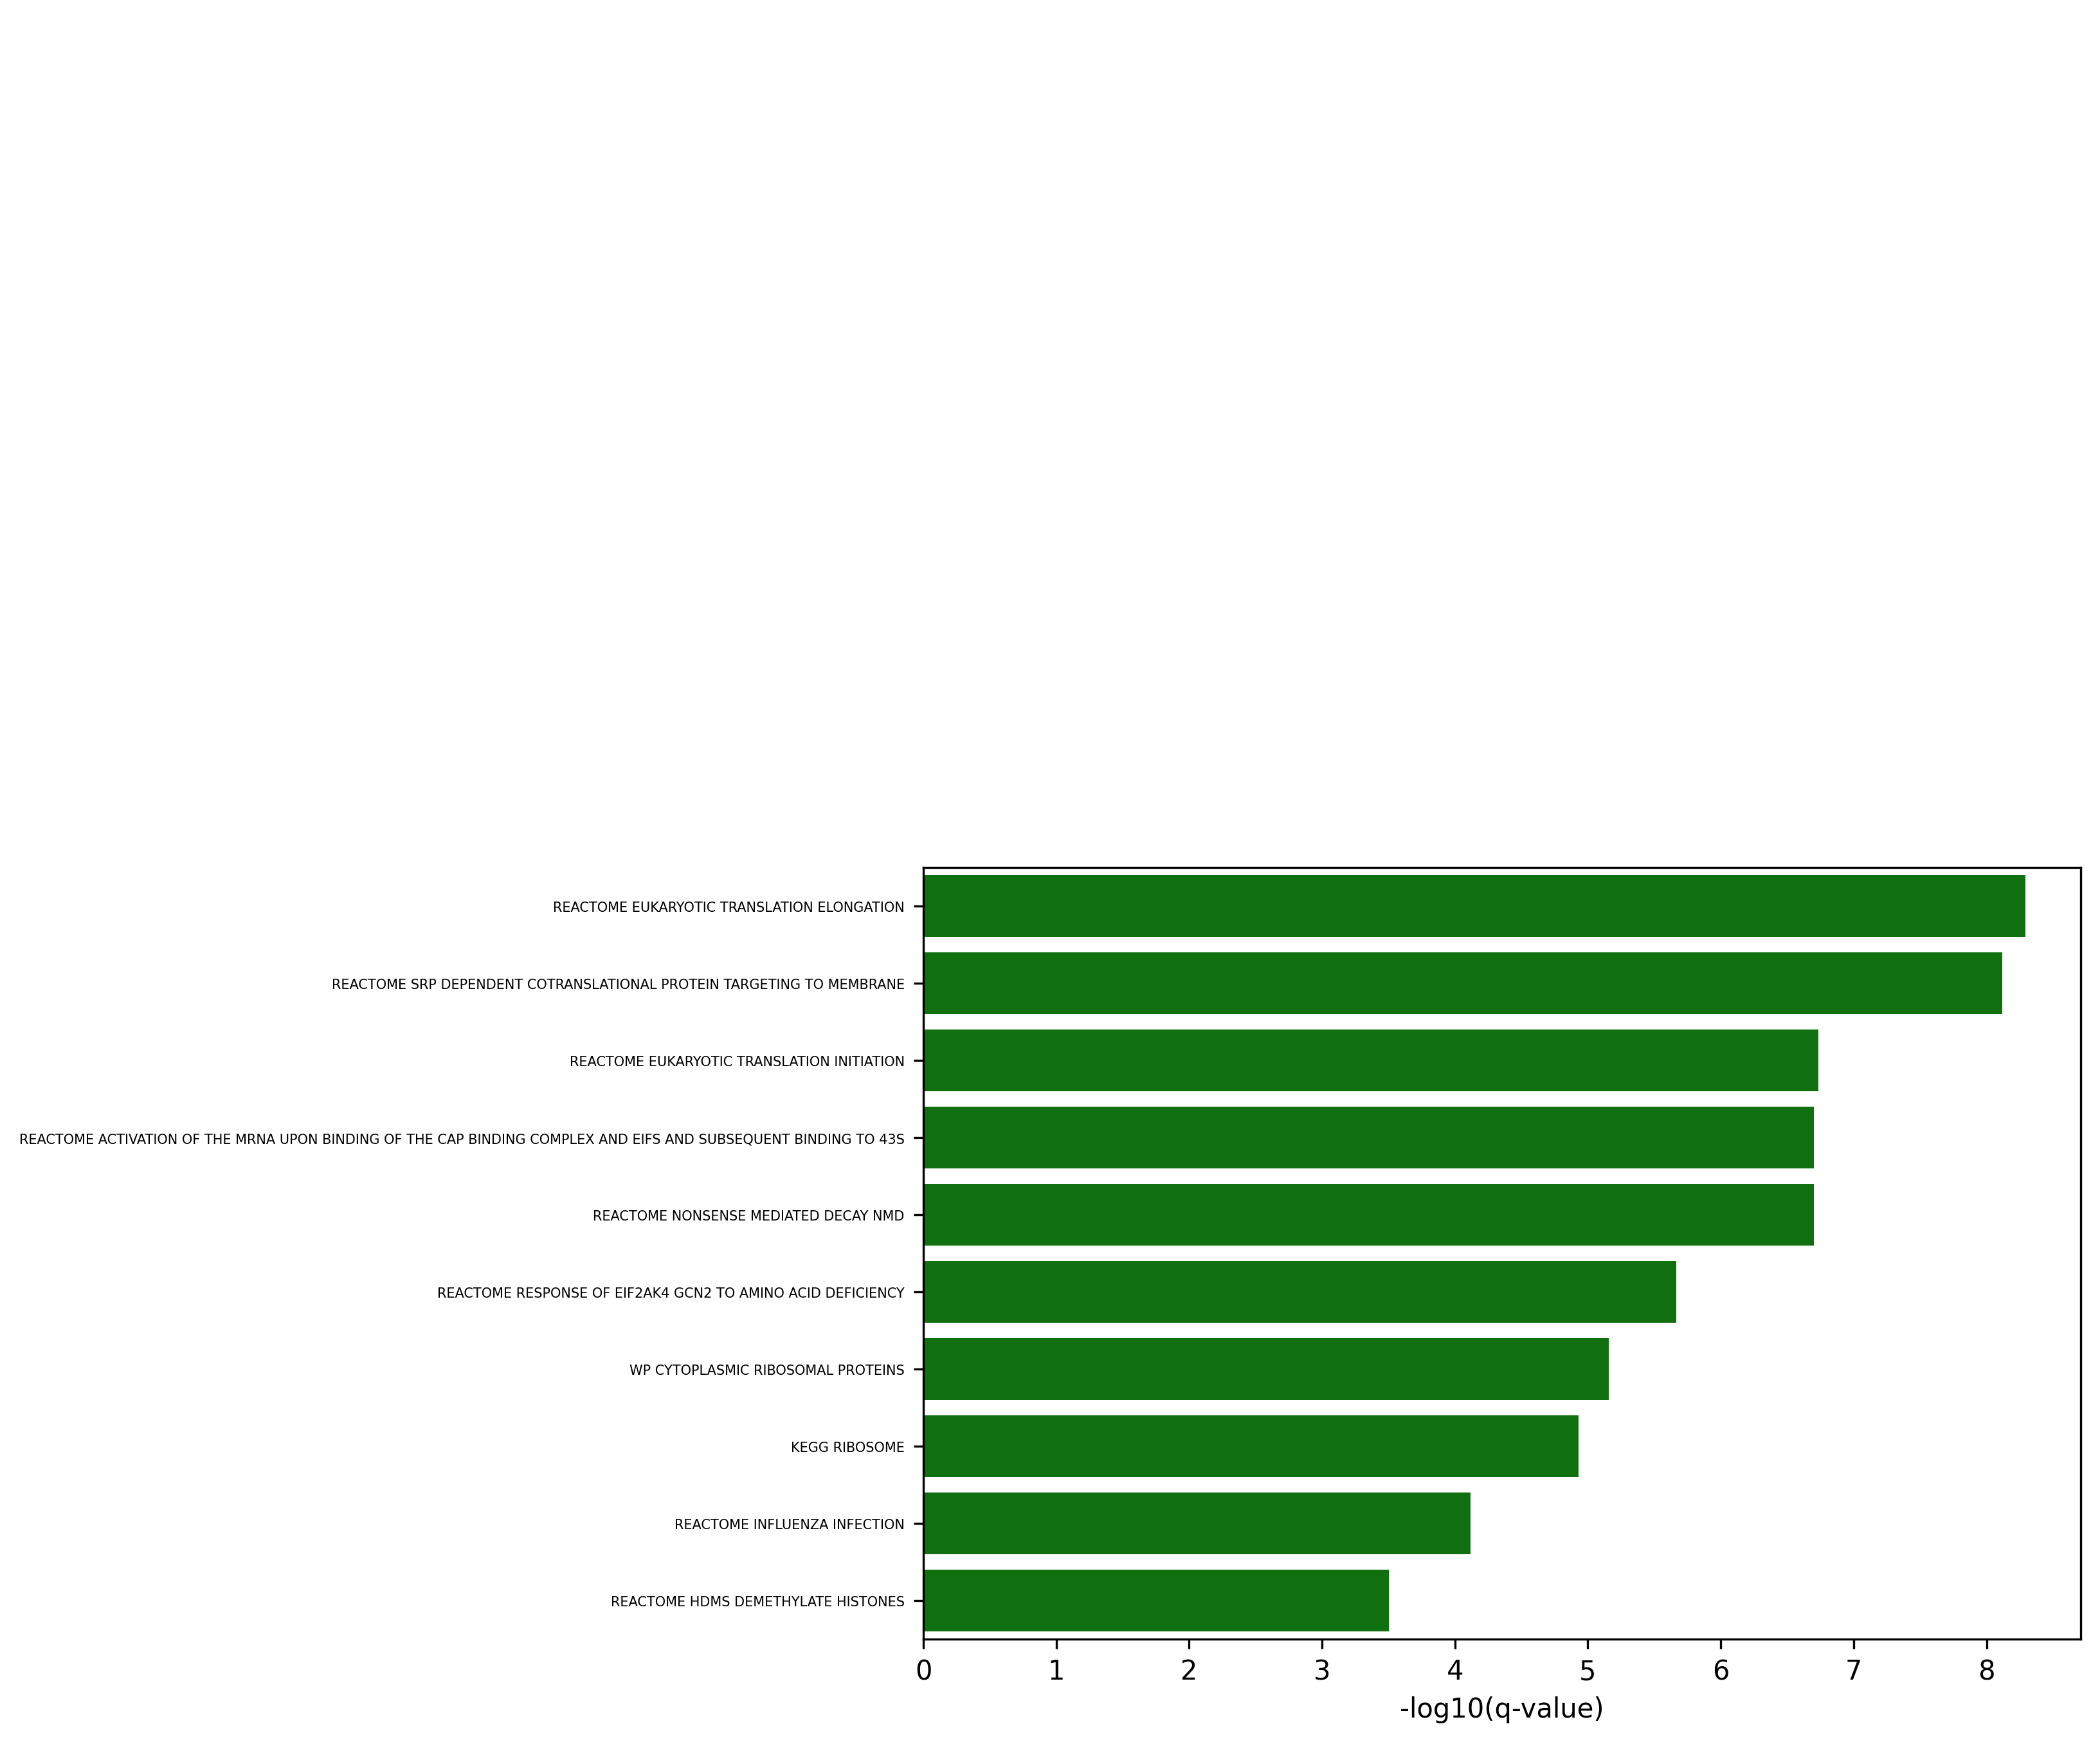

In [14]:
pg.plot_gsea(pseudo, 'fgsea_deseq2')